In [1]:
#Дана функция f(x) = -12*x**4*sin(cos(x)) - 18*x**3+5*x**2 + 10*x - 30

#1. Определить корни

#2. Найти интервалы, на которых функция возрастает

#3. Найти интервалы, на которых функция убывает

#4. Построить график

#5. Вычислить вершину

#6. Определить промежутки, на котором f > 0

#7. Определить промежутки, на котором f < 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
a, b, c, d, e = -12, -18, 5, 10, -30

In [4]:
limit = 10
step = 0.01
line_style = '-'
direct_up = True
color = 'b'
line_s = '-'

In [5]:
x = np.arange(-limit, limit, step)

In [6]:
def switch_line():
    global line_style
    if line_style == '-':
        line_style = '--'
    else:
        line_style = '-'
    return line_style

def switch_color():
    global color
    if color == 'b':
        color = 'r'
    else:
        color = 'b'
    return color

In [7]:
def func(x):
    f = a*x**4*np.sin(np.cos(x)) + b*x**3 + c*x**2 + d*x + e
    return f

In [8]:
x_change = [(-limit, 'limit')]
for i in range(len(x) - 1):
    if func(x[i]) > 0 and func(x[i+1]) < 0 or func(x[i]) < 0 and func(x[i+1]) > 0:
        x_arc = np.arange(x[i], x[i+1], 0.000001)
        
        for j in range(len(x_arc) - 1):
            if (func(x_arc[j]) > 0 and func(x_arc[j+1]) < 0) or (func(x_arc[j]) < 0 and func(x_arc[j+1]) > 0):
                x_change.append((x_arc[j] if abs(0 - x_arc[j]) < abs(0 - x_arc[j+1]) else x_arc[j+1], 'zero'))
            
    if direct_up:
        if func(x[i]) > func(x[i + 1]):
            x_arc = np.arange(x[i], x[i + 1], 0.0000001)
            for j in range(len(x_arc) - 1):
                if func(x_arc[j]) > func(x_arc[j + 1]):
                    x_change.append((x_arc[j], 'direct'))
                    direct_up = False
                    break
    else:
        if func(x[i]) < func(x[i + 1]):
            x_arc = np.arange(x[i], x[i + 1], 0.0000001)
            for j in range(len(x_arc) - 1):
                if func(x_arc[j]) < func(x_arc[j + 1]):
                    x_change.append((x_arc[j], 'direct'))
                    direct_up = True
                    break
        

In [9]:
x_change.append((limit, 'limit'))

[(-10, 'limit'), (-9.978953800006359, 'direct'), (-7.650621999998739, 'zero'), (-6.830000000000068, 'direct'), (-5.026864999999668, 'zero'), (-4.1677834999939085, 'direct'), (-1.3389660000002697, 'zero'), (-0.39000000000020485, 'direct'), (0.45457359999990876, 'direct'), (1.7006073000001052, 'direct'), (2.2730560000001656, 'zero'), (3.8199999999997054, 'direct'), (4.383523000000186, 'zero'), (7.001031700002531, 'direct'), (8.035163999995753, 'zero'), (9.879999999999576, 'direct'), (10, 'limit')]


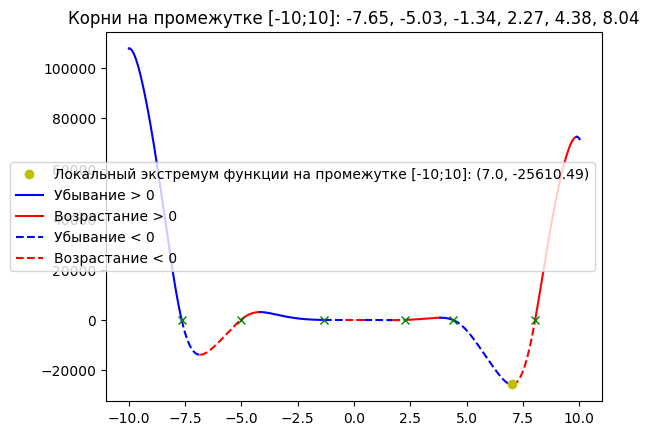

In [10]:
print(x_change)
for i in range(len(x_change) - 1):
    cur_x = np.arange(x_change[i][0], x_change[i + 1][0] + step, step)
    if x_change[i][1] == 'zero':
        plt.rcParams['lines.linestyle'] = switch_line()
        plt.plot(cur_x, func(cur_x), color)
    else:
        plt.plot(cur_x, func(cur_x), switch_color())
        
min_y = min(func(x))
min_x = -limit
for x in x_change:
    if x[1] in ['direct','limit']:
        if abs(func(x[0]) - min_y) < abs(min_x - min_y):
            min_x = x[0]

roots = []
for x in x_change:
    if x[1] == 'zero':
        roots.append(str(round(x[0], 2)))
        plt.plot(x[0], func(x[0]), 'gx')
        
plt.plot(min_x, min_y, 'yo', label=f'Локальный экстремум функции на промежутке [{-limit};{limit}]: ({round(min_x, 2)}, {round(min_y, 2)})')


plt.rcParams['lines.linestyle'] = '-'
plt.plot(0, 0, 'b', label='Убывание > 0')
plt.plot(0, 0, 'r', label='Возрастание > 0')
plt.rcParams['lines.linestyle'] = '--'
plt.plot(0, 0, 'b', label='Убывание < 0')
plt.plot(0, 0, 'r', label='Возрастание < 0')
plt.title(f'Корни на промежутке [{-limit};{limit}]: {", ".join(roots)}')
plt.legend()